### Example 3: Spectral Line Shapes
Part of ESE 156 Remote Sensing Class;
Christian Frankenberg
__________

If we have a line-strength S (in cm$^{-1}$ cm$^2$/molecule) for a specific transition at $\nu_0$, we can compute the cross section as:
$$\sigma(\nu) = S\Phi(\nu-\nu_0)\,,$$
where $\Phi(\nu-\nu_0)$ denotes the line-shape function (in 1/cm$^{-1}$), which is normalized to 1: $\int_{-\infty}^\infty \Phi(\nu-\nu_0) d\nu=1$.

There are several processes that affect the shape and width of $\Phi$ and we will walk through the most important ones here now

##### Doppler Broadening
Doppler broadening is caused by a simple doppler shift of emitted and absorbed frequencies, caused by the relative velocities of the molecules along the line of sight. A doppler shifted apparent frequency from the centroid frequency $\nu_0$ can be described as:
$$\nu = \nu_0\left(1+\frac{v_r}{c}\right)\,$$
where $v_r$ is the relative velocity of the absorbing photon along the line of sight. The doppler shift is then simply
$$ \Delta\nu = \nu_0\frac{v_r}{c}$$
____
In the one-dimensional case along say the x-axis (we only observe the distribution along one line of sight), the speed of moleculed is distributed according to the Maxwell-Boltzmann distribution:
$$f(v_x) = \sqrt{\frac{m}{2\pi kT}}\exp{\left(-\frac{mv_x^2}{2kT}\right)}.$$

We can then define a Doppler width $\Delta \nu_D$ as
$$ \Delta \nu_D = \frac{\nu_0}{c}\sqrt{\frac{2kT}{m}}= \frac{\nu_0}{c}\sqrt{\frac{2RT}{M}}\,$$
which yields the following line-shape:
$$\phi_D(\nu) = \frac{1}{\Delta \nu_D \sqrt{\pi}}\exp{\left(-\frac{(\nu-\nu_0)^2}{\Delta \nu^2_D}\right)}=\,,$$
which is a Gaussian distribution.

Let us put in some numbers with R=8.3144598 J/K/mol at 6000cm$^{-1}$:
<li> T = 220K, 290K
<li> M = 16g/mol (CH$4$) or 44g/mol (CO$_2$)



$ \Delta \nu_D(290K,CO_2)=$ 0.0066cm$^{-1}$

$ \Delta \nu_D(220K,CO_2)=$ 0.0058cm$^{-1}$

$ \Delta \nu_D(290K,CH_4)=$ 0.0110cm$^{-1}$

$ \Delta \nu_D(290K,CH_4)=$ 0.0096cm$^{-1}$

Mulitply with about 1.6585 (2$\sqrt{ln(2)}$) to get FWHM

#### Natural and collisional broadening
Due to the Heisenberg principle
$$\Delta E \Delta t \sim h/2\pi\,,$$
As $\Delta E$ is $h\Delta\nu$, we can write:
$$\Delta\nu = \frac{h/2\pi}{\tau}$$

The natural line-width is defined by using the radiative lifetime but mostly negligible as the natural lifetime of the upper state is usually much smaller than the "perturbed" lifetime in the presence of quencher (e.g. through collisions).

Collisions between molecules reduce the lifetime of the upper state, thus widening the line width. This behavor gives rise to the so-called Lorentz lineshape

$$\phi_L(\nu) = \frac{\alpha_L}{\pi \left[(\nu-\nu_0)^2+\alpha_L^2\right]}$$

$\alpha_L$ depnds linearly on the number density of the perturbing molecules and the relative speed of the collission partners (thus scales linearly with pressure and with $\sqrt{T}$\quad ).

#### Voigt lineshape
The Voig line-shape is the combination of Doppler and Pressure broadening (convolution of the two) but cannot be evaluated analytically. However, there are numerical routines to compute it efficiently.

#### other lineshapes
Once you dig deeper, there are various other more complex line-shapes (and line-mixing effects), which we ignore for now as the Voigt line-shape can provide very reasonable results.

In [7]:
## Make sure plots are create inline
%matplotlib inline
## The usual packages (numpy, matplotlib, etc)
from RSE_style import *
figsize(10,8)

In [12]:
# Import the HAPI interface (located file in the same folder!)
from hapi import *
fetch('CO2_sub',2,1,6214.4,6214.8)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2_sub
  65536 bytes written to ./CO2_sub.data
Header written to ./CO2_sub.header
END DOWNLOAD
                     Lines parsed: 5
PROCESSED


In [24]:
describeTable('CO2_sub')

-----------------------------------------
CO2_sub summary:
-----------------------------------------
Comment: 
Contains lines for (12C)(16O)2
 in 6214.400-6214.800 wavenumber range
Number of rows: 5
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_fla

In [4]:
nu_, cs_co2_1atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':1.,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_075atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.75,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_05atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.5,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_025atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.25,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_01atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.1,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_doppler = absorptionCoefficient_Doppler(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.25,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_Voigt = absorptionCoefficient_Voigt(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.1,'T':293},IntensityThreshold=1e-27)

Text(0.5,0,'Wavenumber (cm$^{-1}$)')

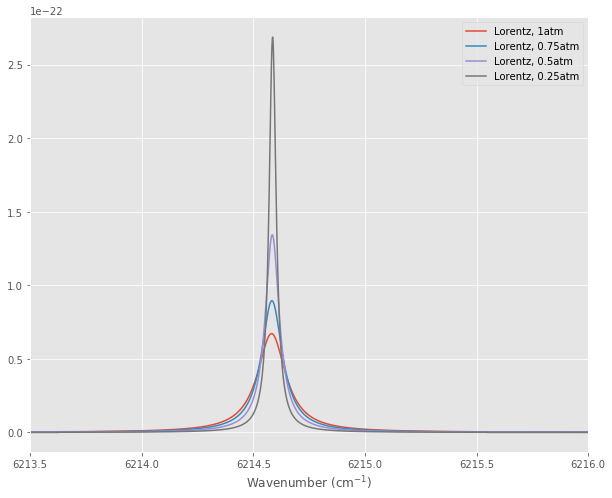

In [9]:
figsize(10,8)
plt.plot(nu_, cs_co2_1atm, label='Lorentz, 1atm')
plt.plot(nu_, cs_co2_075atm,label='Lorentz, 0.75atm')
plt.plot(nu_, cs_co2_05atm,label='Lorentz, 0.5atm')
plt.plot(nu_, cs_co2_025atm,label='Lorentz, 0.25atm')
#plt.plot(nu_, cs_co2_doppler,label='Doppler, 293K')
plt.legend(loc=0)
plt.xlim((6213.5,6216))
plt.xlabel('Wavenumber (cm$^{-1}$)')

Text(0.5,0,'Wavenumber (cm$^{-1}$)')

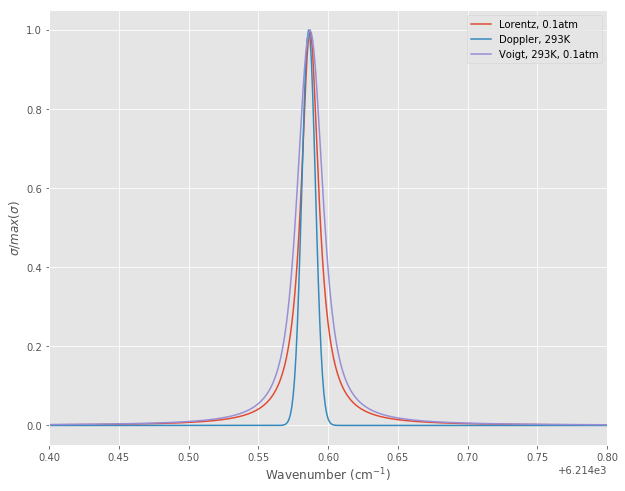

In [10]:
figsize(10,8)
plt.plot(nu_, cs_co2_01atm/np.max(cs_co2_01atm), label='Lorentz, 0.1atm')
plt.plot(nu_, cs_co2_doppler/np.max(cs_co2_doppler),label='Doppler, 293K')
plt.plot(nu_, cs_co2_Voigt/np.max(cs_co2_Voigt),label='Voigt, 293K, 0.1atm')
plt.xlim((6214.4,6214.8))
plt.legend()
plt.ylabel('$\sigma/max(\sigma)$')
plt.xlabel('Wavenumber (cm$^{-1}$)')

Text(0.5,0,'Wavenumber (cm$^{-1}$)')

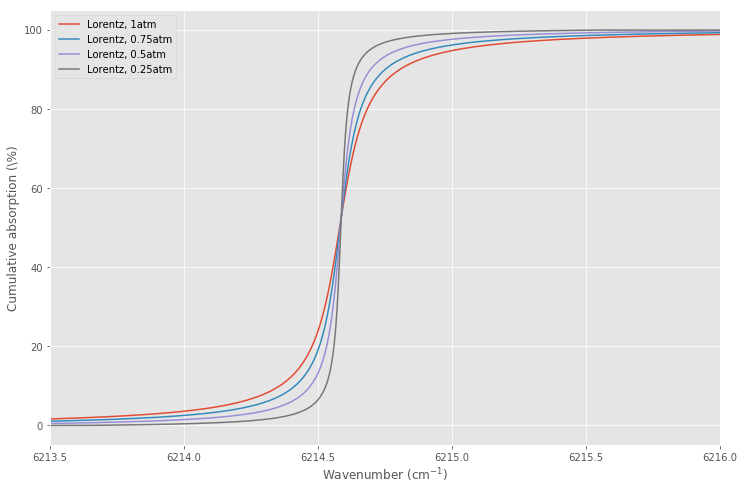

In [11]:
figsize(12,8)
su = np.sum(cs_co2_1atm)
plt.plot(nu_, np.cumsum(cs_co2_1atm)/su*100, label='Lorentz, 1atm')
plt.plot(nu_, np.cumsum(cs_co2_075atm)/su*100,label='Lorentz, 0.75atm')
plt.plot(nu_, np.cumsum(cs_co2_05atm)/su*100,label='Lorentz, 0.5atm')
plt.plot(nu_, np.cumsum(cs_co2_025atm)/su*100,label='Lorentz, 0.25atm')
plt.xlim((6213.5,6216))
plt.legend(loc=0)
plt.ylabel('Cumulative absorption (\%)')
plt.xlabel('Wavenumber (cm$^{-1}$)')

## From an individual line to a band
Here, we will just compute an entire band of CO$_2$ (a few to be precise) and look at some simple behavior, e.g. the re-distribution of individual lines in the P and R branch with changing temperature.

In [13]:
# Import the HAPI interface (located file in the same folder!)
from hapi import *
fetch('CO2',2,1,6000,6400)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
Header written to ./CO2.header
END DOWNLOAD
                     Lines parsed: 8613
PROCESSED


In [19]:
nu_l, cs_co2_Voigt220 = absorptionCoefficient_Voigt(SourceTables='CO2',WavenumberStep=0.001, WavenumberRange=[6000,6400],Environment={'p':1.,'T':220},IntensityThreshold=1e-27)
nu_l, cs_co2_Voigt290 = absorptionCoefficient_Voigt(SourceTables='CO2',WavenumberStep=0.001, WavenumberRange=[6000,6400],Environment={'p':1,'T':290},IntensityThreshold=1e-27)

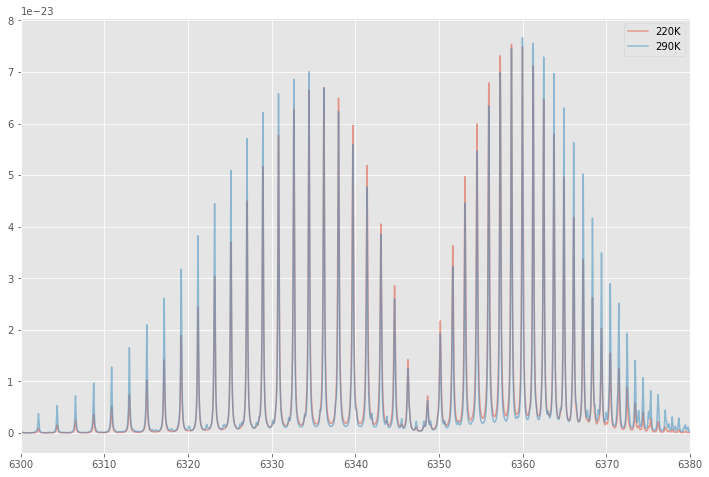

In [23]:
plt.plot(nu_l, cs_co2_Voigt220,alpha=0.5, label='220K')
plt.plot(nu_l, cs_co2_Voigt290,alpha=0.5, label='290K')
plt.xlim((6300,6380))
plt.legend()